In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy import stats
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')

In [3]:
test = pd.read_csv('test.csv')

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
train.drop('Id', inplace = True, axis = 1)
test.drop('Id', inplace = True, axis = 1)

In [6]:
target = train['SalePrice']

In [7]:
# train.drop('SalePrice', axis = 1, inplace = True)

In [8]:
features = pd.concat([train.drop('SalePrice', axis = 1), test])

In [9]:
features.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [10]:
print("Unique values in each categorical column:")
for col in features.select_dtypes(include=[object]):
    print(col,":", train[col].unique())

Unique values in each categorical column:
MSZoning : ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street : ['Pave' 'Grvl']
Alley : [nan 'Grvl' 'Pave']
LotShape : ['Reg' 'IR1' 'IR2' 'IR3']
LandContour : ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities : ['AllPub' 'NoSeWa']
LotConfig : ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope : ['Gtl' 'Mod' 'Sev']
Neighborhood : ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1 : ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2 : ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType : ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle : ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle : ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl : ['CompShg' 'WdShngl' 'Metal' 'WdShake'

In [11]:
target.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

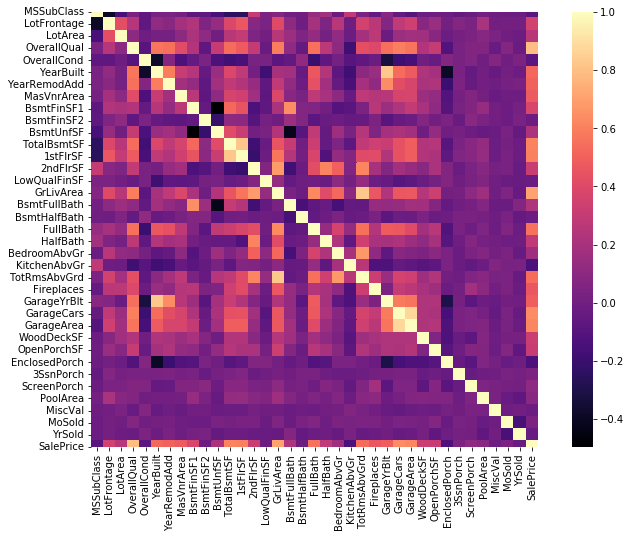

In [12]:
plt.subplots(figsize=(12,8))
sns.heatmap(train.corr(), cmap = 'magma', square=True)

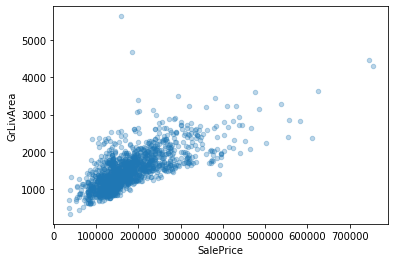

In [13]:
train.plot.scatter('SalePrice', 'GrLivArea', alpha = 0.3)

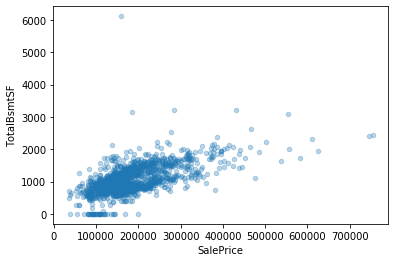

In [14]:
train.plot.scatter('SalePrice', 'TotalBsmtSF', alpha = 0.3)

Анализ целевой

Skewness: 1.880940746034036 
Kurtosis: 6.509812011089439


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


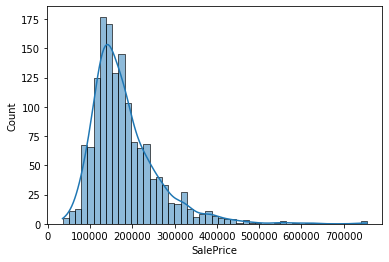

In [15]:
kurt_raw = stats.kurtosis(train['SalePrice'])
skewness_raw = stats.skew(train['SalePrice'])
sns.histplot(train['SalePrice'], kde = 'True')
print(f'Skewness: {skewness_raw} \nKurtosis: {kurt_raw}')

Преобразование целевой. 2 способа:
Box-Cox и Log1p

In [16]:
log1p = np.log1p(train['SalePrice'])
log1p_kurt_raw = round(stats.kurtosis(log1p), 2)
log1p_skewness_raw = round(stats.skew(log1p), 2)
print(f'Skewness: {log1p_skewness_raw} \nKurtosis: {log1p_kurt_raw}')

Skewness: 0.12 
Kurtosis: 0.8


Skewness: -0.01 
Kurtosis: 0.87


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


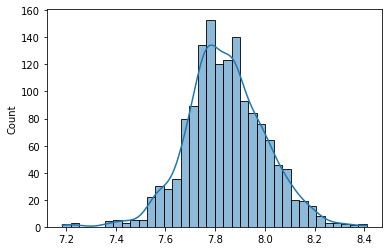

In [17]:
boxcox_target, lmbda  = stats.boxcox(train['SalePrice'])
boxcox_kurt_raw = round(stats.kurtosis(boxcox_target),2)
boxcox_skewness_raw = round(stats.skew(boxcox_target), 2)
sns.histplot(boxcox_target, kde = 'True')
print(f'Skewness: {boxcox_skewness_raw} \nKurtosis: {boxcox_kurt_raw}')
# Для инверсии: scipy.special.inv_boxcox scipy.special.inv_boxcox()

Box-Cox лучше, но не везде

In [18]:
train['SalePrice'] = boxcox_target

Fill NA

In [19]:
missed = {}
for col in features.columns:
    if features[col].isnull().any():
        missed.update({col: [round(features[col].isnull().sum()/len(features)*100,2), features[col].dtype]})
sorted(missed.items(), key = lambda x: x[1], reverse=True)

[('PoolQC', [99.66, dtype('O')]),
 ('MiscFeature', [96.4, dtype('O')]),
 ('Alley', [93.22, dtype('O')]),
 ('Fence', [80.44, dtype('O')]),
 ('FireplaceQu', [48.65, dtype('O')]),
 ('LotFrontage', [16.65, dtype('float64')]),
 ('GarageFinish', [5.45, dtype('O')]),
 ('GarageQual', [5.45, dtype('O')]),
 ('GarageCond', [5.45, dtype('O')]),
 ('GarageYrBlt', [5.45, dtype('float64')]),
 ('GarageType', [5.38, dtype('O')]),
 ('BsmtCond', [2.81, dtype('O')]),
 ('BsmtExposure', [2.81, dtype('O')]),
 ('BsmtQual', [2.77, dtype('O')]),
 ('BsmtFinType2', [2.74, dtype('O')]),
 ('BsmtFinType1', [2.71, dtype('O')]),
 ('MasVnrType', [0.82, dtype('O')]),
 ('MasVnrArea', [0.79, dtype('float64')]),
 ('MSZoning', [0.14, dtype('O')]),
 ('Utilities', [0.07, dtype('O')]),
 ('Functional', [0.07, dtype('O')]),
 ('BsmtFullBath', [0.07, dtype('float64')]),
 ('BsmtHalfBath', [0.07, dtype('float64')]),
 ('Exterior1st', [0.03, dtype('O')]),
 ('Exterior2nd', [0.03, dtype('O')]),
 ('Electrical', [0.03, dtype('O')]),
 ('Kit

String fill NA

In [20]:
fill_none_strs = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 
                  'GarageCond', 'BsmtExposure', 'BsmtFinType2', 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'MasVnrType',
                  ]
fill_mod_strs = ['MSZoning', 'Utilities', 'Functional', 'Exterior1st', 'Exterior2nd', 'Electrical', 'KitchenQual', 
                 'SaleType' 
                ]
fill_zer_ints = ['LotFrontage', 'GarageYrBlt', 'MasVnrArea', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtFinSF1', 'BsmtFinSF2',
                'GarageCars', 'GarageArea', 'BsmtUnfSF', 'TotalBsmtSF']
def fill_strs(df):
    for cols in fill_none_strs:
        df[cols] = df[cols].fillna('None')
    for cols in fill_mod_strs:
        df[cols] = df[cols].fillna(df[cols].mode()[0])
    return df
def fill_ints(df):
    for cols in fill_zer_ints:
        df[cols] = df[cols].fillna(0)
    return(df)

In [21]:
features = fill_strs(features)
features = fill_ints(features)

In [22]:
missed = {}
for col in features.columns:
    if features[col].isnull().any():
        missed.update({col: [round(features[col].isnull().sum()/len(features)*100,2), features[col].dtype]})
sorted(missed.items(), key = lambda x: x[1], reverse=True)

[]

In [33]:
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_cols = features.select_dtypes(numeric_dtypes).columns

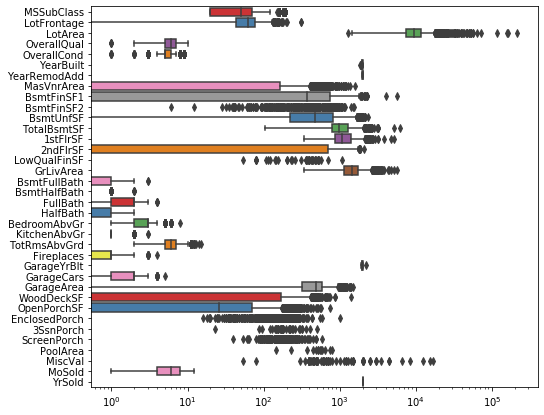

In [34]:
f, ax = plt.subplots(figsize=(8, 7))
ax.set_xscale("log")
ax = sns.boxplot(data=features[num_cols] , orient="h", palette="Set1")

In [60]:
# delete outliers


In [64]:
# skew fix
def skew_fix(df):
    for col in num_cols:
        if stats.skew(df[col]) > 0.5:
            df[col] = np.log1p(df[col])
    return df

In [65]:
features = skew_fix(features)

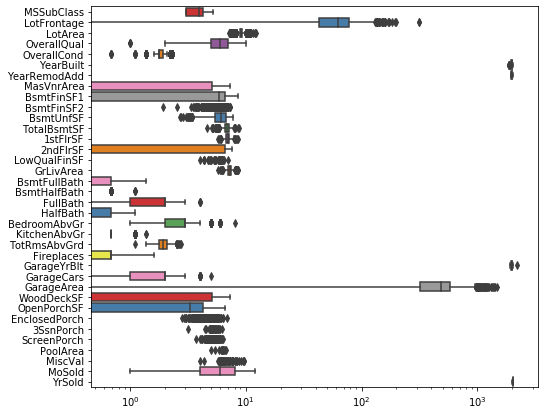

In [66]:
f, ax = plt.subplots(figsize=(8, 7))
ax.set_xscale("log")
ax = sns.boxplot(data=features[num_cols] , orient="h", palette="Set1")